# HEART DISEASE DATA CLEANING AND VISUALIZING 

In this notebook, we will clean the dataset and visualize key features to explore relationships between variables and identify the factors that may influence heart disease.

## Importing necessary libraries.

In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the csv file.

In [6]:
df = pd.read_csv("heart.csv")

## Overview of the dataset.

In [7]:
print(df.shape)
print(df.info())  
print(df.head())

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB
None
   Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1       typical     145   233    1        2    150      0      2.3   
1   67    1  asy

# Cleaning Data 

In [8]:
# Missing values
df = df.dropna()

In [9]:
# Checking if there is any duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [10]:
# Handling outliers

numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_cols = numeric_df.columns 

no_clipped_value = True

for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    mask = (df[col] < lower_limit) | (df[col] > upper_limit)
    clipped_values = df.loc[mask, col]

    if not clipped_values.empty:
        print(f"Column: {col}\n")
        print("Values before clipping:\n")
        print(clipped_values.to_list())
        no_clipped_value = False
    
    df[col] = np.clip(df[col], lower_limit, upper_limit)

if no_clipped_value :
    print("There is no clipped value.")
    

Column: RestBP

Values before clipping:

[172, 180, 200, 174, 178, 192, 180, 178, 180]
Column: Chol

Values before clipping:

[417, 407, 564, 394, 409]
Column: Fbs

Values before clipping:

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Column: MaxHR

Values before clipping:

[71]
Column: Oldpeak

Values before clipping:

[6.2, 5.6, 4.2, 4.2, 4.4]
Column: Ca

Values before clipping:

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [11]:
# Basic Statistic Summary 
print(df.describe(include='all').T)

           count unique           top freq        mean        std    min  \
Age        301.0    NaN           NaN  NaN   54.451827   9.067258   29.0   
Sex        301.0    NaN           NaN  NaN    0.681063   0.466841    0.0   
ChestPain    301      4  asymptomatic  143         NaN        NaN    NaN   
RestBP     301.0    NaN           NaN  NaN  131.368771  16.701903   94.0   
Chol       301.0    NaN           NaN  NaN  245.820598  47.625424  126.0   
Fbs        301.0    NaN           NaN  NaN         0.0        0.0    0.0   
RestECG    301.0    NaN           NaN  NaN    0.990033   0.994937    0.0   
MaxHR      301.0    NaN           NaN  NaN  149.750831  22.704501   86.0   
ExAng      301.0    NaN           NaN  NaN    0.325581   0.469372    0.0   
Oldpeak    301.0    NaN           NaN  NaN    1.027907   1.112243    0.0   
Slope      301.0    NaN           NaN  NaN    1.601329   0.616872    1.0   
Ca         301.0    NaN           NaN  NaN    0.656146   0.869216    0.0   
Thal        

# VISUALIZATIONS

In [12]:
# Global figsize 
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_style('whitegrid')

First lets see how many of our patients have heart disease. We are gonna use bar graphs.

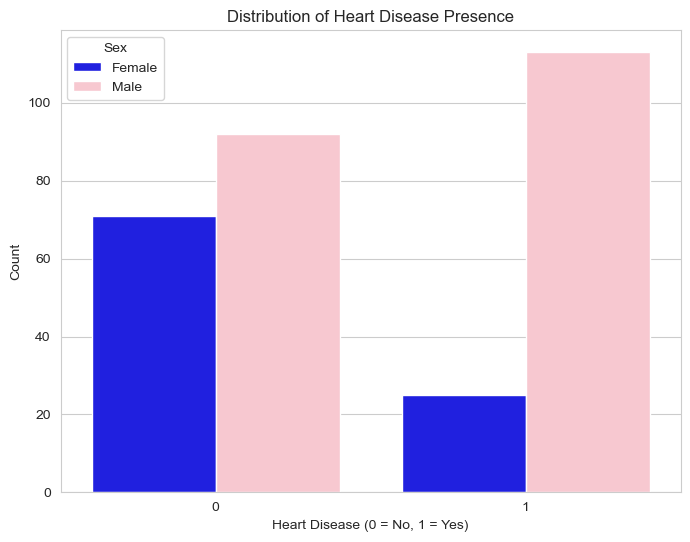

In [27]:
ax = sns.countplot(x='Target', data=numeric_df , hue = "Sex" ,  palette = ["blue" , "pink"])
ax.set_title('Distribution of Heart Disease Presence')
ax.set_xlabel('Heart Disease (0 = No, 1 = Yes)')
ax.set_ylabel('Count')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Female", "Male"], title="Sex")

## Correlation matrix

A correlation matrix shows how strongly each pair of variables in your dataset is related to each other.

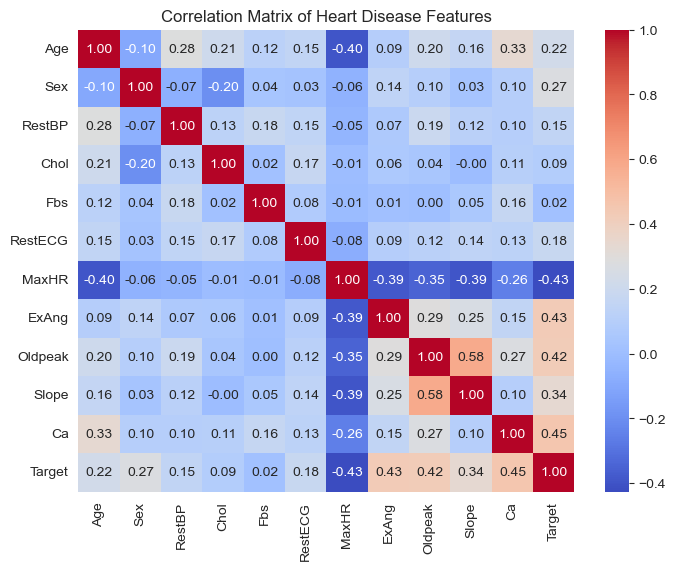

In [13]:
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()
greater_corrs = ["MaxHR","ExAng","Oldpeak","Ca"]

Using our Corralation matrices. I'm going to choose stronger pairs between target and the other coulumns. And I'm going to create graphs for that pairs.

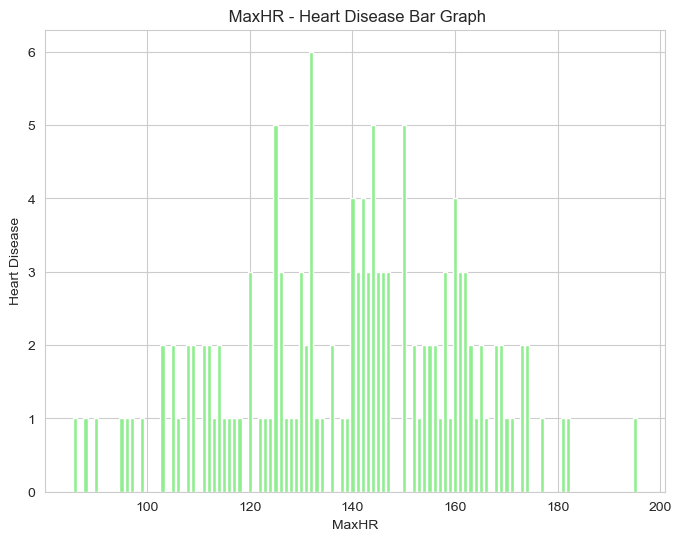

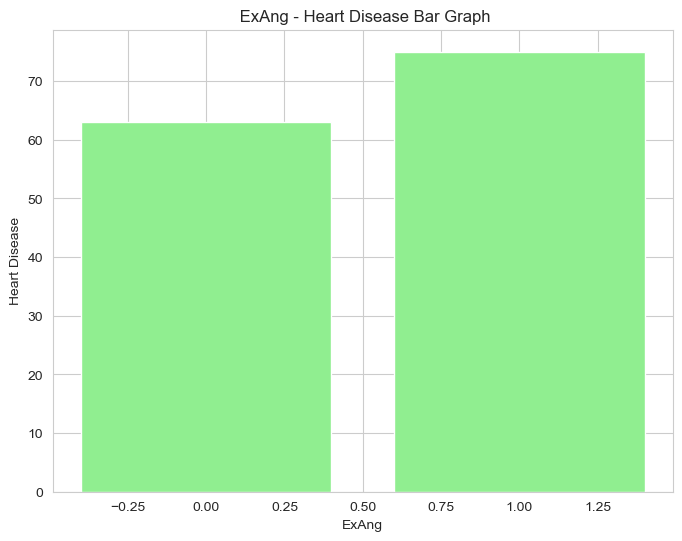

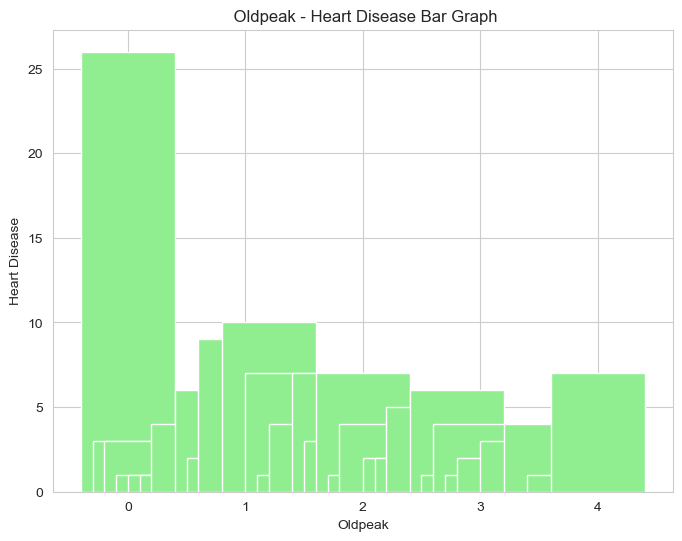

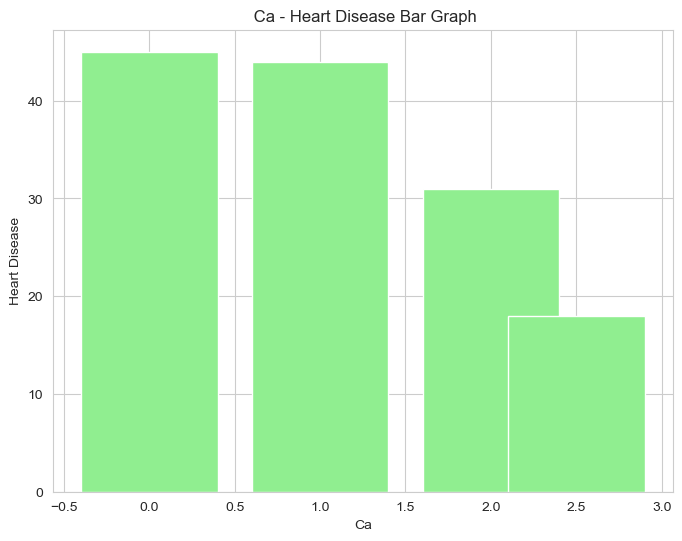

In [21]:
for col in greater_corrs :
    target_counts = df[df["Target"] == 1][col].value_counts().sort_index()
    plt.bar(target_counts.index, target_counts.values , color = "lightgreen")
    plt.xlabel(col)
    plt.ylabel("Heart Disease")
    plt.title(f" {col} - Heart Disease Bar Graph")
    plt.show()

**Overview**

This project analyzes a heart disease dataset to explore which factors are linked to the presence of heart disease. The work includes data cleaning, handling outliers, and creating visualizations to highlight key relationships.

**Data Cleaning**

Missing values were removed, duplicates checked, and outliers handled using the IQR method to keep numeric values within a reasonable range. This ensured a clean and consistent dataset for analysis.

**Analysis**

A statistical summary was generated to understand the data distribution. Correlation analysis and visualizations revealed that MaxHR, Oldpeak, ExAng, and Ca had the strongest relationships with heart disease.

**Visualization**

*Plots were created to show:*

 -> Heart disease distribution by gender

 -> Correlation heatmap of numeric features

 -> Bar graphs for the most correlated variables

**Insights**

People with lower MaxHR, lower Oldpeak, and exercise-induced angina tend to have heart disease more often. Most cases were observed among male patients.